In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob

from astropy.io import fits
from specim_test.specim.specfuncs import spec2d, spec1d, echelle1d

In [7]:
file = '../galaxy_spectra/XSHOOTER_data/Phase3-20211122T184246Z-001/Phase3/ADP.2018-10-15T10_50_31.476.fits'

In [8]:
spec = spec2d.Spec2d(file, xtrim=[2500, 22000], ytrim=[35, 71])


Loading file ../galaxy_spectra/XSHOOTER_data/Phase3-20211122T184246Z-001/Phase3/ADP.2018-10-15T10_50_31.476.fits
-----------------------------------------------
Read in 2-dimensional spectrum from ../galaxy_spectra/XSHOOTER_data/Phase3-20211122T184246Z-001/Phase3/ADP.2018-10-15T10_50_31.476.fits (HDU=0)
The input dataset was trimmed
 xrange: 2500:22001.  yrange: 35:72
Final data dimensions (x y): 19501 x 37

Dispersion axis:              x
N_pixels along dispersion axis: 19501



In [9]:
v_data = fits.open(file)[1].data[35:72, 2500:22001]**2

In [10]:
spec.vardata =v_data

Profile max value (before normalization) 62.215256


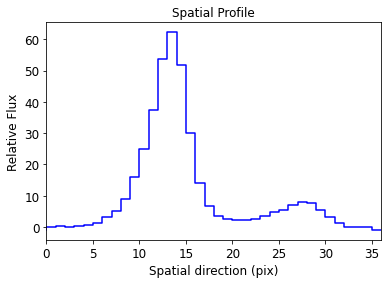

In [11]:
profile = spec.spatial_profile(pixrange=[10000, 11500])


To create an initial model you first need to enter degree of background polynomial(<3) and number of Gaussian and Moffat profile as integers.
Order of background polynomial : 0
Number of Gaussian profile : 0
Number of Moffat profile : 3

Now enter constants of the background polynomial upto degree 0
c0 : 1

Enter parameter values for a Moffat profile in following format...
amplitude_value, x_0_value, gamma_value, alpha_value

Parameters of Moffat profile 1 : 62, 14, 3, 4

amplitude=62.000000, x_0=14.000000, gamma=3.000000, alpha=4.000000

Parameters of Moffat profile 2 : 8, 25, 2, 3

amplitude=8.000000, x_0=25.000000, gamma=2.000000, alpha=3.000000

Parameters of Moffat profile 3 : 10, 28.5, 3, 4

amplitude=10.000000, x_0=28.500000, gamma=3.000000, alpha=4.000000

Fitted model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1] + [2] + [3]
Components: 
    [0]: <Polynomial1D(0, c0=-0.44902991)>

    [1]: <Moffat1D(amplitude=62.5260

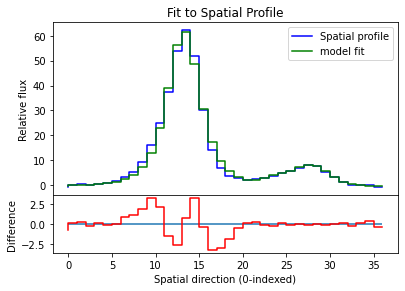

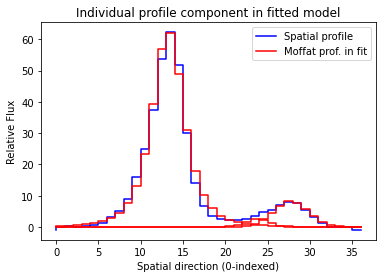


Do you want to start over ? : type yes/no
no


In [12]:
mod = spec.initial_model()


Initial model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1] + [2] + [3]
Components: 
    [0]: <Polynomial1D(0, c0=-0.44902991)>

    [1]: <Moffat1D(amplitude=62.52601265, x_0=13.76014163, gamma=3.34255144, alpha=1.89543936)>

    [2]: <Moffat1D(amplitude=2.49617175, x_0=24.25216693, gamma=8.2295273, alpha=16.17164569)>

    [3]: <Moffat1D(amplitude=8.26332682, x_0=28.26496155, gamma=9.28133282, alpha=10.43276499)>
Parameters:
            c0_0           amplitude_1    ...      gamma_3           alpha_3      
    ------------------- ----------------- ... ----------------- ------------------
    -0.4490299072667023 62.52601264581483 ... 9.281332824778945 10.432764985497382

-------------------------------------------


Fitted model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1] + [2] + [3]
Components: 
    [0]: <Polynomial1D(0, c0=-0.42518989)>

    [1]: <Moffat1D(amplit

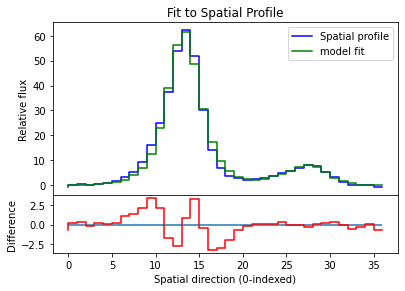

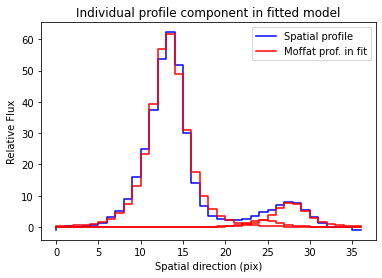

<CompoundModel(c0_0=-0.42518989, amplitude_1=62.3490249, x_0_1=13.75592192, gamma_1=3.48437701, alpha_1=2.02320638, amplitude_2=2.37676705, x_0_2=24.89516243, gamma_2=3.48437701, alpha_2=2.02320638, amplitude_3=7.88632221, x_0_3=28.31288394, gamma_3=3.48437701, alpha_3=2.02320638)>

In [13]:
def tie_pos1_moffat(model):
    return model.x_0_1 + (1.76 / 0.158) # xshooter pixscale in visible wavelength 0.158

def tie_pos2_moffat(model):
    return model.x_0_1 + (2.3 / 0.158) 

def tie_gamma_moffat(model):
    return model.gamma_1

def tie_alpha_moffat(model):
    return model.alpha_1 

spec.mod0[2].x_0.tied = tie_pos1_moffat
spec.mod0[3].x_0.tied = tie_pos2_moffat
spec.mod0[2].gamma.tied = tie_gamma_moffat
spec.mod0[2].alpha.tied = tie_alpha_moffat
spec.mod0[3].gamma.tied = tie_gamma_moffat
spec.mod0[3].alpha.tied = tie_alpha_moffat
spec.refined_model(mod)


Running fit_trace
---------------------------------------------------------
Fitting to the trace at 780 segments
  of the 2D spectrum with stepsize=25 pix ...
    Done
Fitting polynomial of degree 3 to parameter: c0_0
Fitting polynomial of degree 4 to parameter: x_0_1
Fitting polynomial of degree 3 to parameter: gamma_1
Fitting polynomial of degree 3 to parameter: alpha_1
Fitting polynomial of degree 4 to parameter: x_0_2
Fitting polynomial of degree 3 to parameter: gamma_2
Fitting polynomial of degree 3 to parameter: alpha_2
Fitting polynomial of degree 4 to parameter: x_0_3
Fitting polynomial of degree 3 to parameter: gamma_3
Fitting polynomial of degree 3 to parameter: alpha_3


<IPython.core.display.Javascript object>


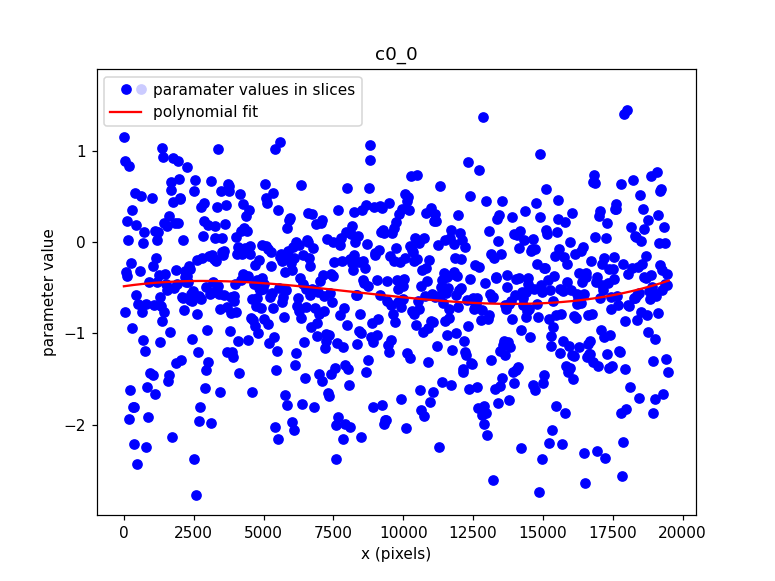

<IPython.core.display.Javascript object>


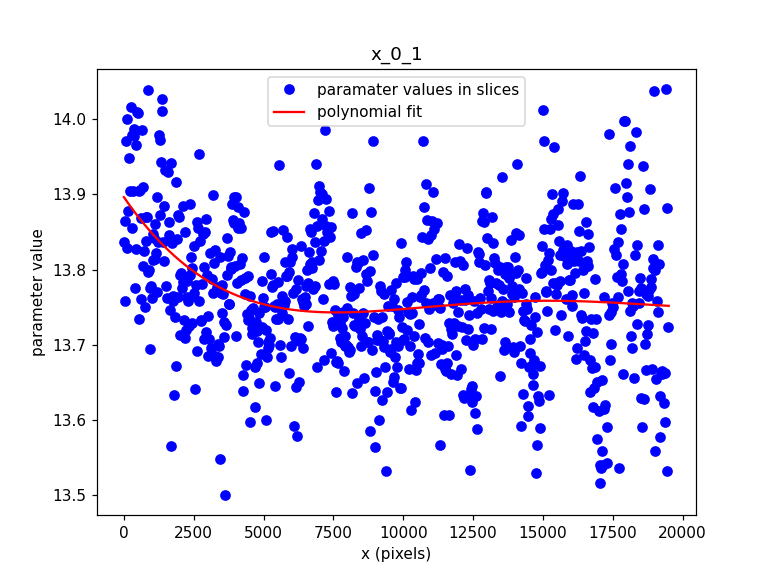

<IPython.core.display.Javascript object>


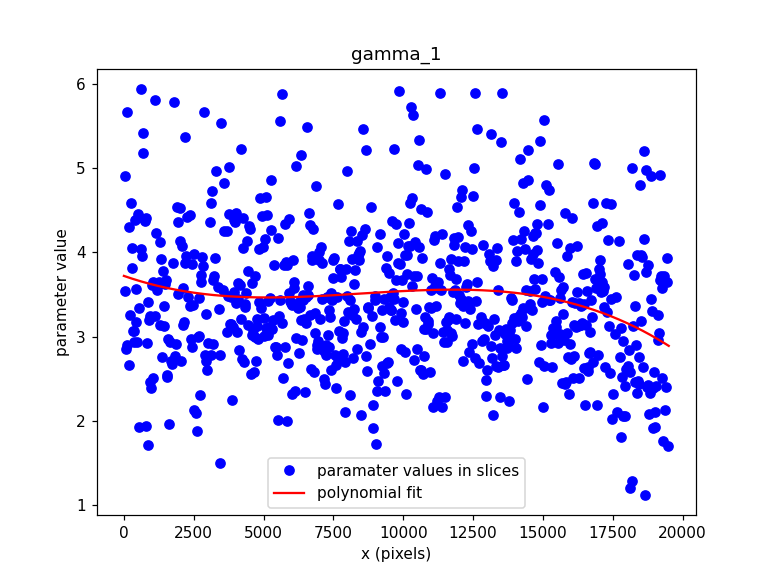

<IPython.core.display.Javascript object>


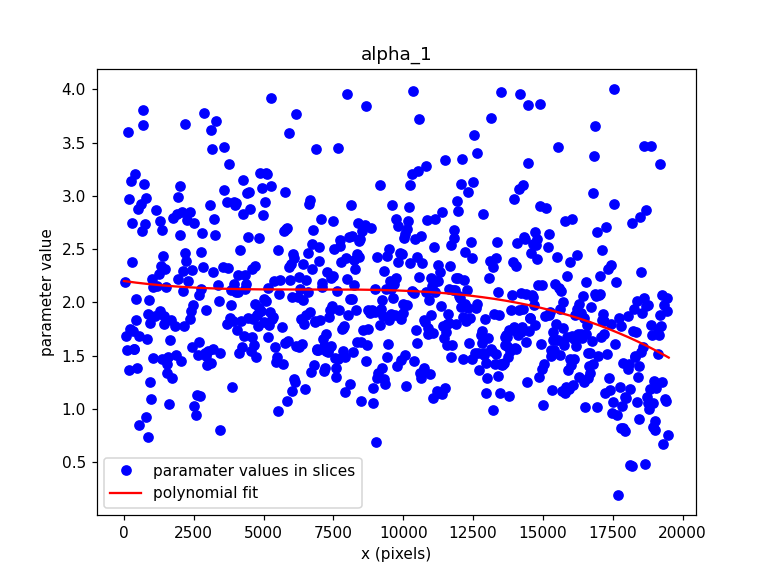

<IPython.core.display.Javascript object>


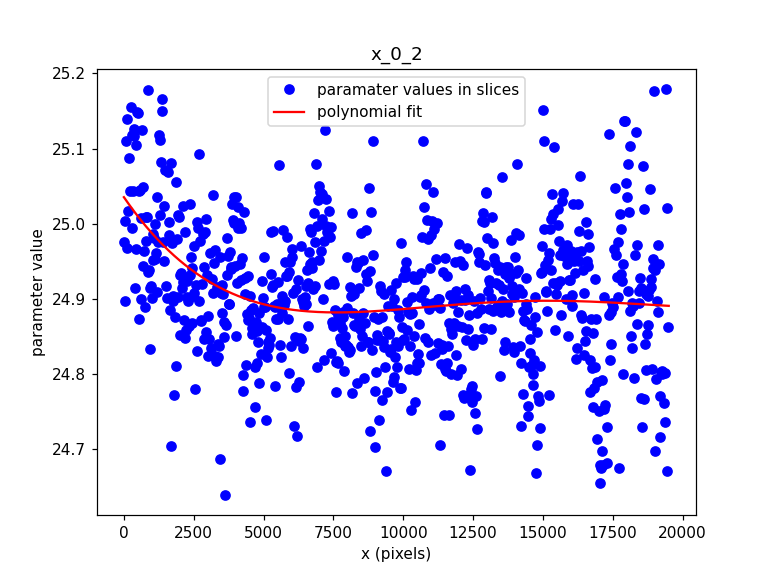

<IPython.core.display.Javascript object>


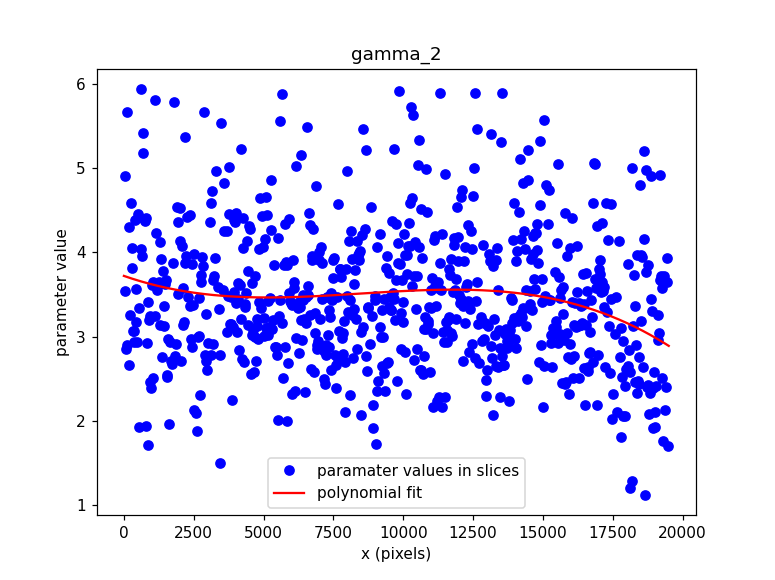

<IPython.core.display.Javascript object>


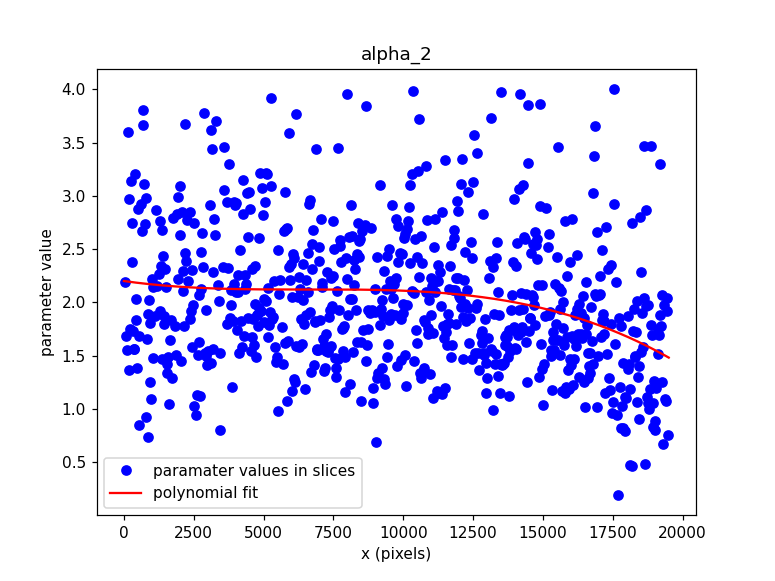

<IPython.core.display.Javascript object>


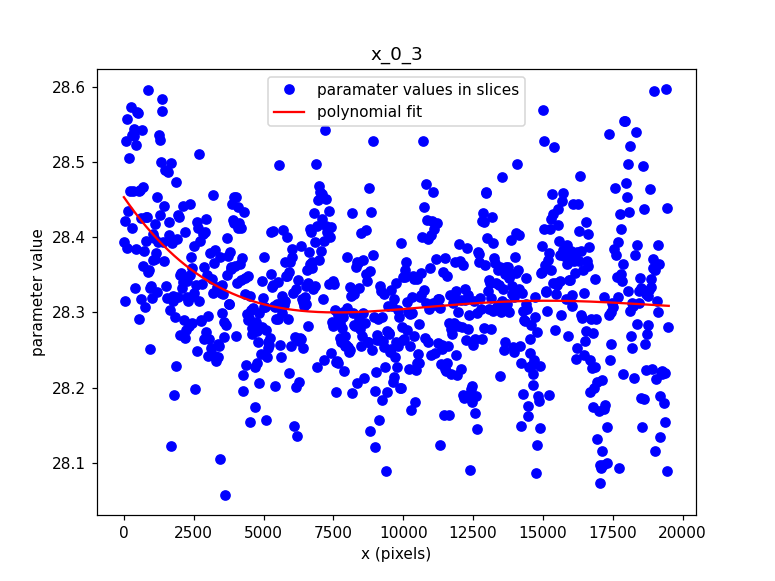

<IPython.core.display.Javascript object>


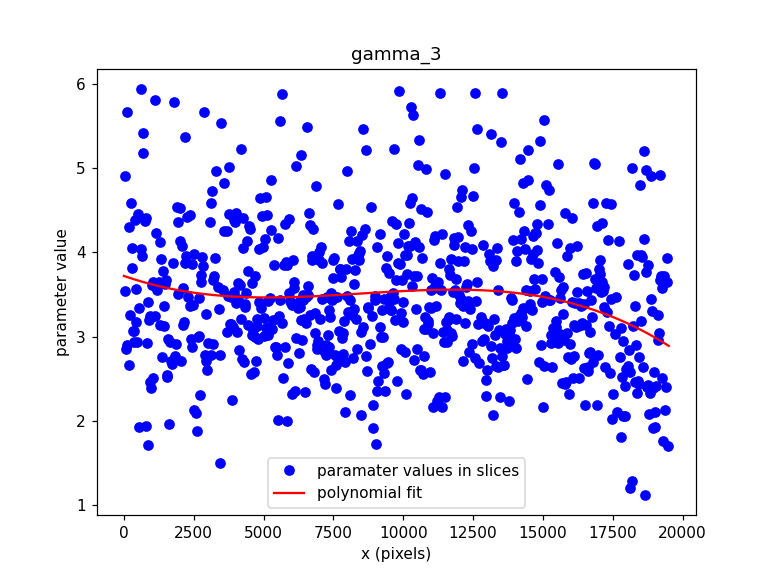

<IPython.core.display.Javascript object>


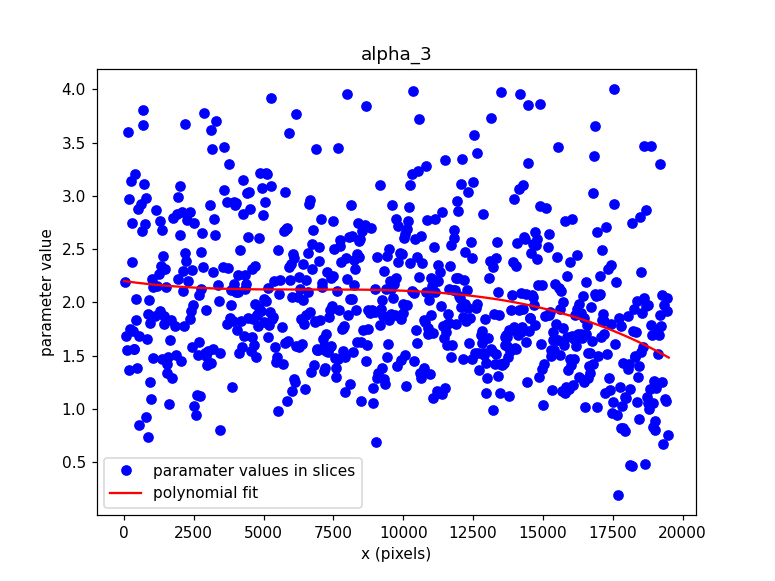

In [35]:
spec.find_and_trace(spec.mod0, stepsize=25, fitorder={'x_0_1':4, 'x_0_2':4, 'x_0_3':4},
                    polyorder=3) #fitrange=fitrange_list[i]
plt.show()

Fitting to 3 components, plus a background
Extracting the spectrum.  Please be patient
 Extraction range (pixels): 0 - 19501
Fitting to the trace at 19501 segments
  of the 2D spectrum with stepsize=1 pix ...
 Spectrum Start:   583.66
 Spectrum End:      973.66
 Dispersion (1st pixel):   0.02
 Dispersion (average):      0.02

 Spectrum Start:   583.66
 Spectrum End:      973.66
 Dispersion (1st pixel):   0.02
 Dispersion (average):      0.02

 Spectrum Start:   583.66
 Spectrum End:      973.66
 Dispersion (1st pixel):   0.02
 Dispersion (average):      0.02


Plotting the spectrum


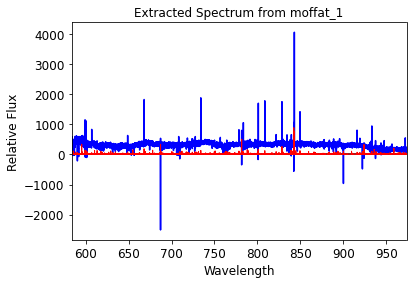

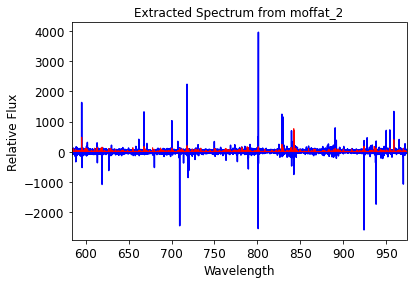

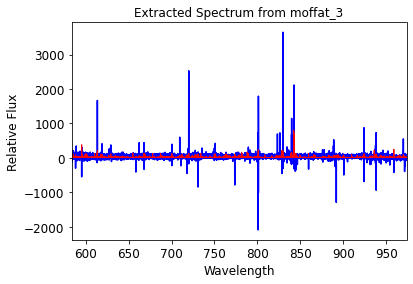

In [15]:
spec.extract(method='modelfit') #, extrange=ext)
plt.show()

In [36]:
sp_im = spec1d.Spec1d(wav=spec.spectra[0][1]['wav']*10, flux = spec.spectra[0][1]['flux'],
                      var=spec.spectra[0][1]['var'])

 Spectrum Start:  5836.60
 Spectrum End:     9736.60
 Dispersion (1st pixel):   0.20
 Dispersion (average):      0.20



<IPython.core.display.Javascript object>


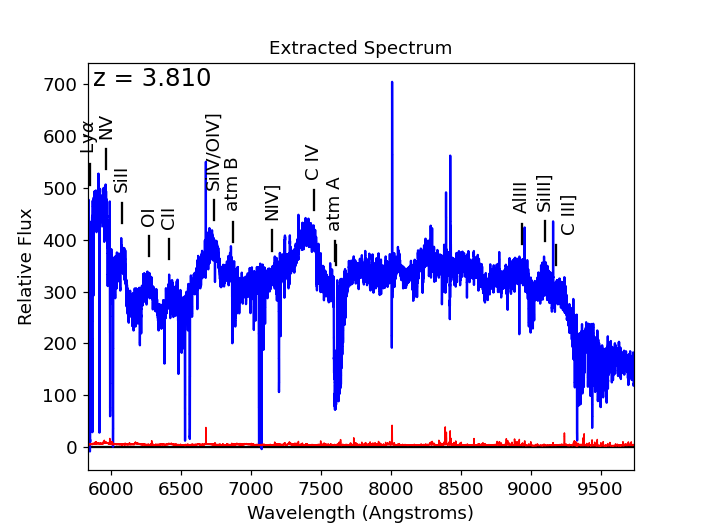


Line        lambda_rest  lambda_obs
----------  -----------  -----------
Ly-alpha      1216.00       5848.96
N V           1240.10       5964.88
Si II         1263.30       6076.47
O I           1303.50       6269.84
C II          1334.53       6419.09
Si IV/O IV    1400.00       6734.00
N IV]         1486.50       7150.07
C IV          1549.10       7451.17
Al III        1858.70       8940.35
Si III]       1892.00       9100.52
C III]        1908.70       9180.85



In [37]:
%matplotlib notebook
sp_im.smooth(7)
sp_im.mark_lines('strongem', z=3.81, usesmooth=True)

In [38]:
sp_d = spec1d.Spec1d(wav=spec.spectra[1][1]['wav']*10, flux = spec.spectra[1][1]['flux'],
                      var=spec.spectra[1][1]['var'])

 Spectrum Start:  5836.60
 Spectrum End:     9736.60
 Dispersion (1st pixel):   0.20
 Dispersion (average):      0.20



<IPython.core.display.Javascript object>


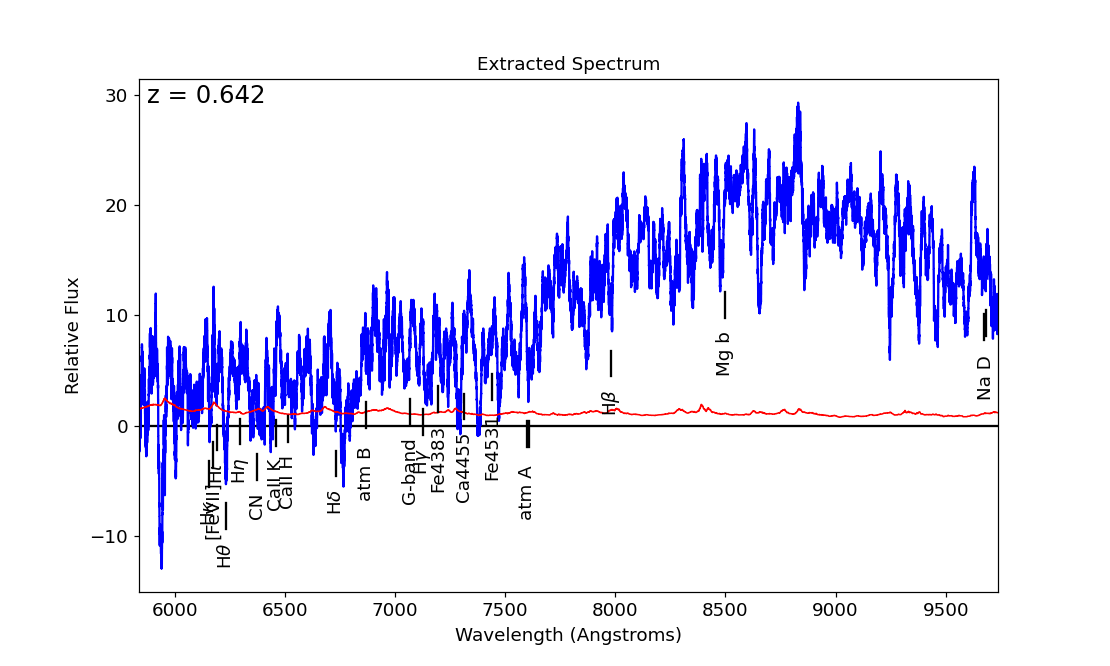


Line        lambda_rest  lambda_obs
----------  -----------  -----------
H-kappa       3750.00       6157.50
[Fe VII]      3761.40       6176.22
H-iota        3770.00       6190.34
H-theta       3797.00       6234.67
H-eta         3835.00       6297.07
CN bandhd     3883.00       6375.89
CaII K        3933.67       6459.09
CaII H        3968.47       6516.23
H-delta       4101.00       6733.84
G-band        4305.00       7068.81
H-gamma       4340.00       7126.28
Fe4383        4383.00       7196.89
Ca4455        4455.00       7315.11
Fe4531        4531.00       7439.90
H-beta        4861.00       7981.76
Mg I (b)      5176.00       8498.99
Na I (D)      5889.95       9671.30
Na I (D)      5895.92       9681.10



In [39]:
sp_d.smooth(95)
sp_d.mark_lines('abs', z=0.642, usesmooth=True)

In [46]:
sp_im1 = spec1d.Spec1d(wav=spec.spectra[2][1]['wav'][:-2500]*10, flux = spec.spectra[2][1]['flux'][:-2500],
                      var=spec.spectra[2][1]['var'][:-2500])

 Spectrum Start:  5836.60
 Spectrum End:     9236.60
 Dispersion (1st pixel):   0.20
 Dispersion (average):      0.20



<IPython.core.display.Javascript object>


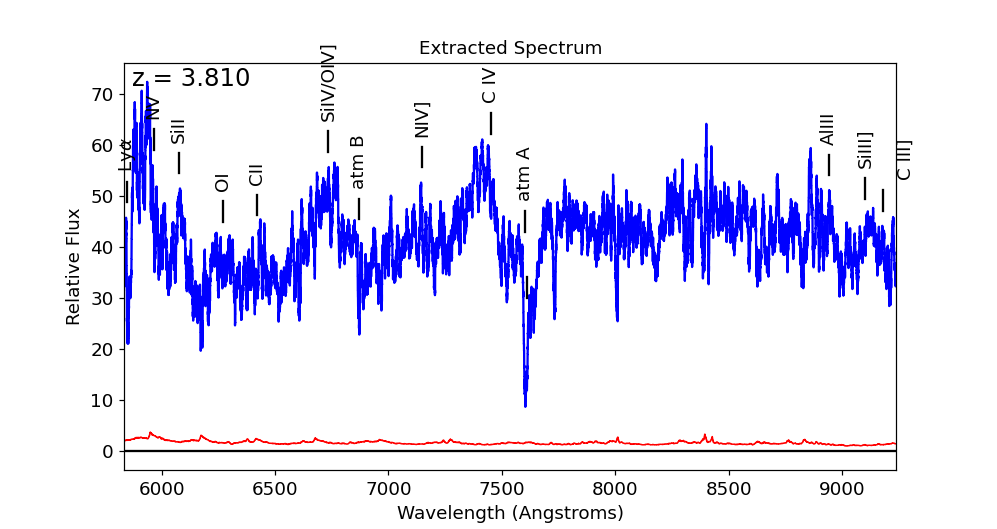


Line        lambda_rest  lambda_obs
----------  -----------  -----------
Ly-alpha      1216.00       5848.96
N V           1240.10       5964.88
Si II         1263.30       6076.47
O I           1303.50       6269.84
C II          1334.53       6419.09
Si IV/O IV    1400.00       6734.00
N IV]         1486.50       7150.07
C IV          1549.10       7451.17
Al III        1858.70       8940.35
Si III]       1892.00       9100.52
C III]        1908.70       9180.85



In [50]:
sp_im1.smooth(51)
sp_im1.mark_lines('strongem', z=3.81, usesmooth=True)
#sp_im1.mark_lines('abs', z=0.641, usesmooth=True)